## Function initialization

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy

## Linearity fit

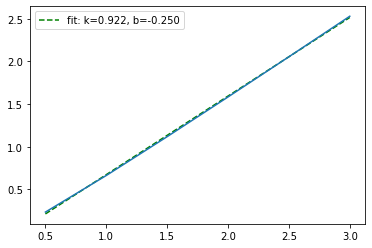

In [61]:
P_out_lin = np.array([0.23255763486121048,
 0.6619101110186287,
 1.1173425941460775,
 1.5830898563508191,
 2.0546165657677204,
 2.529926592384975])
P_in_lin = np.arange(0.5,3.5,0.5)

def lin_approx(x,k,b):
    return k*x+b

popt, pcov = curve_fit(lin_approx, P_in_lin, P_out_lin)

plt.plot(P_in_lin, lin_approx(P_in_lin, *popt), 'g--',
         label='fit: k=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(P_in_lin, P_out_lin)
plt.legend()

In [62]:
print(f"The resulting linear f(x) = {popt[0]}*x {popt[1]}")

The resulting linear f(x) = 0.9217549383422039*x -0.24983058318569212


## Nonlinear fit

        3         2
-1.682 x + 2.327 x - 0.3013 x + 0.01053
sum of squared residuals of the least squares fit = 2.7289904974319607e-06


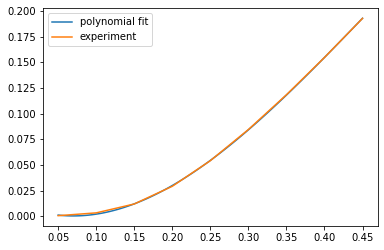

In [69]:
#x from 0.05 to 0.45 through function approximation
P_ins = np.arange(0.05, 0.5, 0.05)
P_outs = [0.0004897163694191536,0.0032350341059472574,0.01190943152511096,0.029166513042637607,0.05414214869096625,0.08449778621548755,0.11841263368667229,0.15476884007533365,0.1928853739855893]
polynom_res, res, rank, singular_values, rcond = np.polyfit(P_ins, P_outs, full=True, deg = 3)
p = np.poly1d(polynom_res)

xp = np.linspace(0.05, 0.45, 100)
plt.plot(xp,p(xp),label = 'polynomial fit')
plt.plot(P_ins,P_outs,label = 'experiment')
plt.legend()
print(p)
print(f"sum of squared residuals of the least squares fit = {res[0]}")

## Resulted P_out Vs P_in

Text(0.5, 1.0, 'Fit on the whole power range')

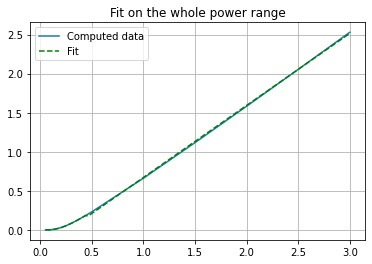

In [129]:
def nonlinearity(x):
    return -1.682*x**3 + 2.327*x**2 - 0.3013*x + 0.01053
def linearity(x):
    return x*0.92175494-0.24983058
def where(x):
    y = copy.copy(x)
    y[x>=0.45]=linearity(x[x>=0.45])
    y[x<0.45]=nonlinearity(x[x<0.45])
    return y

x = np.concatenate((P_ins,P_in_lin))
y = np.concatenate((P_outs,P_out_lin))
x_new = np.linspace(0.05,3.0,100)
y_new = where(x_new)

plt.plot(x,y, label = 'Computed data')
plt.plot(x_new, y_new, 'g--', label = 'Fit')
plt.legend()
plt.grid()
plt.title('Fit on the whole power range')